In [2]:
# TASK 1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


In [3]:
try:
    iris = load_iris()
    df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    df['species'] = iris.target
    df['species'] = df['species'].map(dict(enumerate(iris.target_names)))
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")


Dataset loaded successfully!


In [4]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
print("Dataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [6]:
if df.isnull().values.any():
    print("Filling missing values with column mean...")
    df.fillna(df.mean(numeric_only=True), inplace=True)
else:
    print("No missing values found.")


No missing values found.


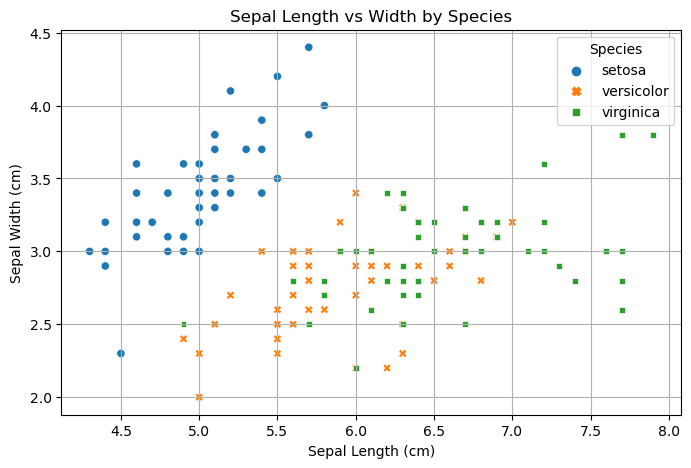

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', style='species')
plt.title('Sepal Length vs Width by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


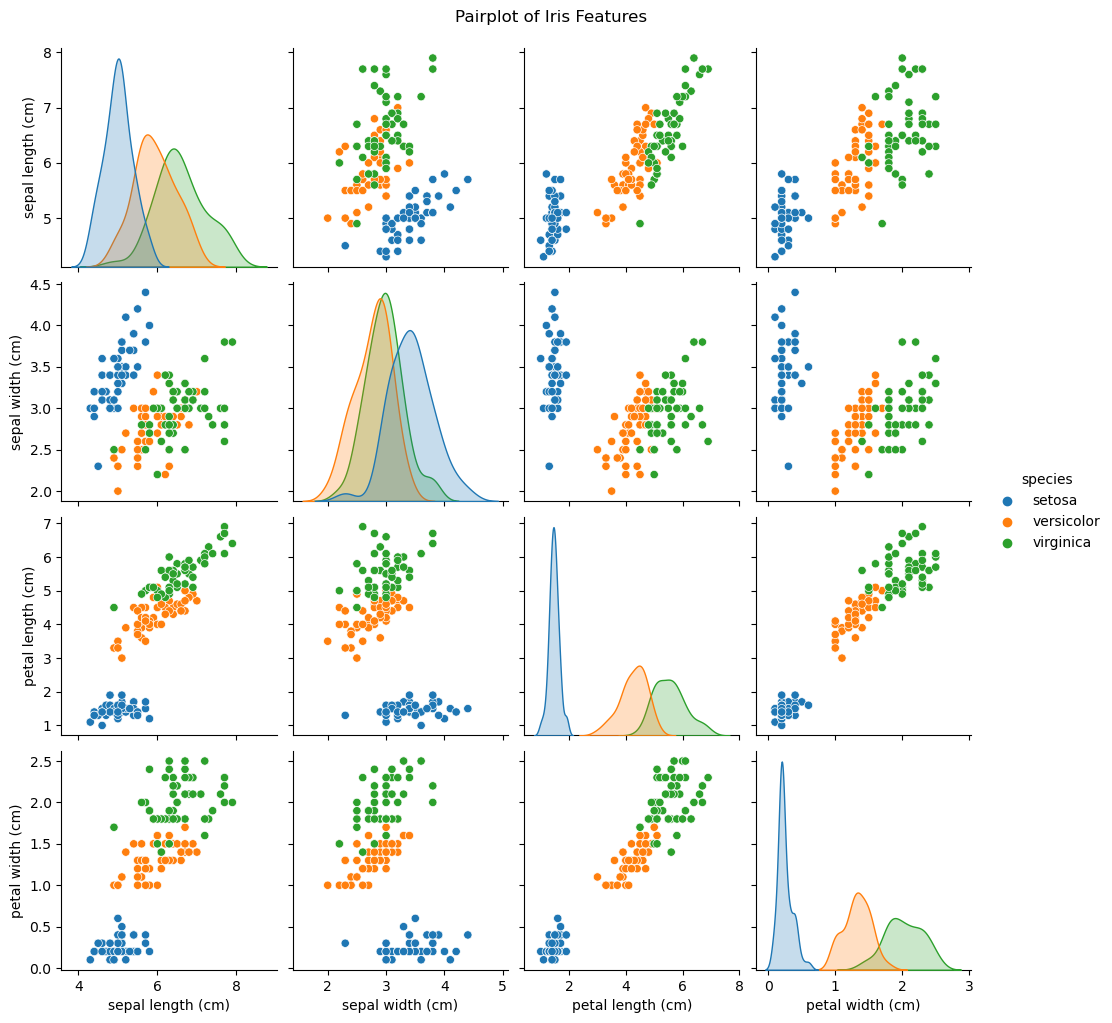

In [8]:
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()


In [ ]:
# TASK 2


In [9]:
df.describe()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
grouped_means = df.groupby('species').mean(numeric_only=True)
grouped_means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


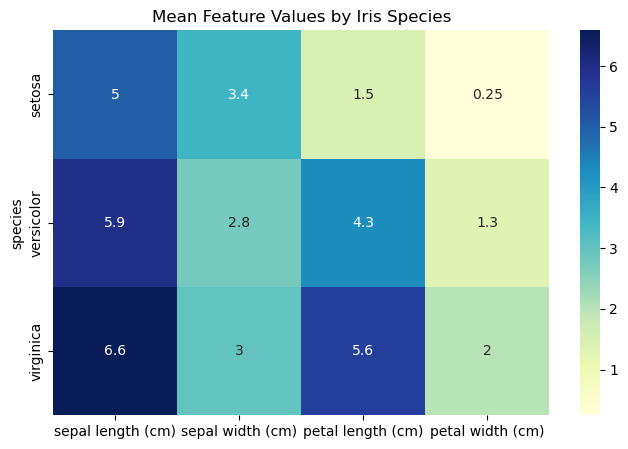

In [11]:
plt.figure(figsize=(8, 5))
sns.heatmap(grouped_means, annot=True, cmap='YlGnBu')
plt.title('Mean Feature Values by Iris Species')
plt.show()

In [ ]:
### Observations:
- **Petal length and width** are the most distinguishing features between species.
- **Setosa** has significantly smaller petals than Versicolor and Virginica.
- **Virginica** has the **largest sepal and petal dimensions**, on average.
- **Sepal width** is slightly higher in Setosa but not very distinctive.

In [ ]:
# tASK 3

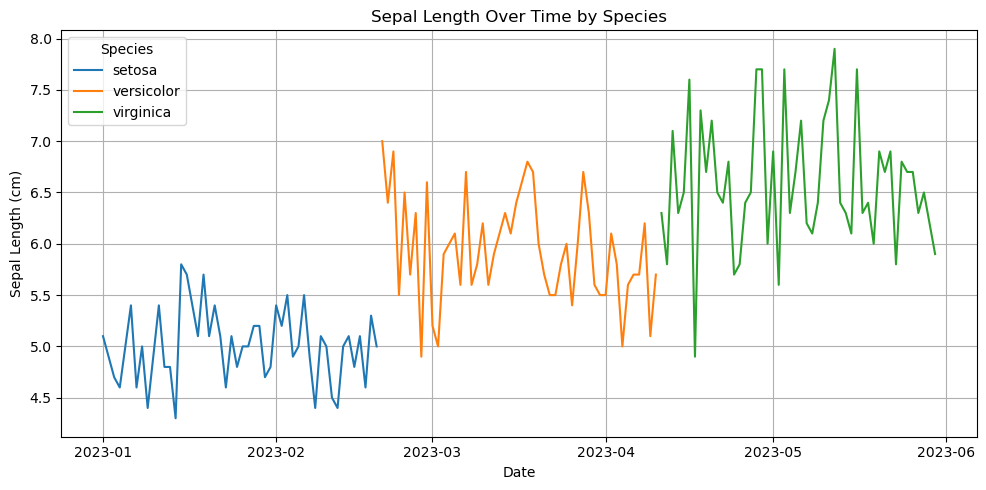

In [12]:
# Simulate a time series using index as a proxy for time
df['observation_date'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')

# Line plot of sepal length over time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='observation_date', y='sepal length (cm)', hue='species')
plt.title('Sepal Length Over Time by Species')
plt.xlabel('Date')
plt.ylabel('Sepal Length (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipykernel_430/3913797969.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='species', y='petal length (cm)', estimator='mean', ci=None, palette='pastel')


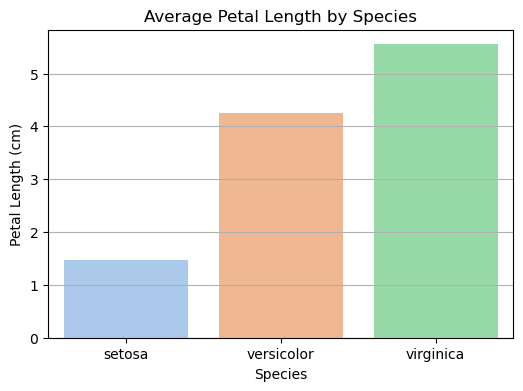

In [13]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='species', y='petal length (cm)', estimator='mean', ci=None, palette='pastel')
plt.title('Average Petal Length by Species')
plt.xlabel('Species')
plt.ylabel('Petal Length (cm)')
plt.grid(axis='y')
plt.show()


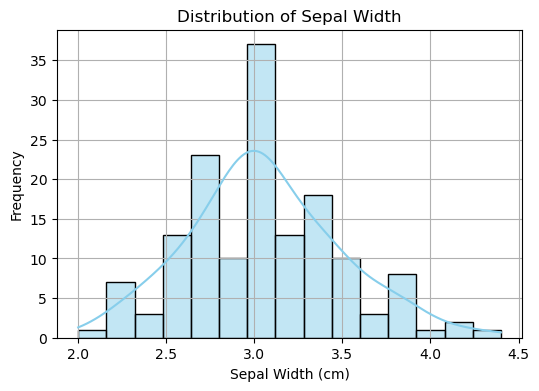

In [14]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='sepal width (cm)', bins=15, kde=True, color='skyblue')
plt.title('Distribution of Sepal Width')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


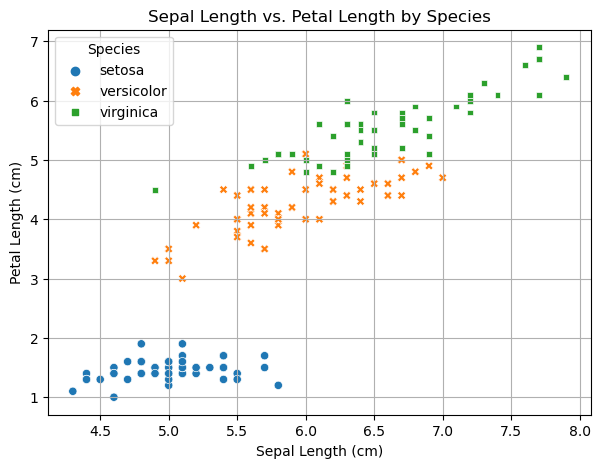

In [15]:
plt.figure(figsize=(7, 5))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', style='species')
plt.title('Sepal Length vs. Petal Length by Species')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Petal Length (cm)')
plt.legend(title='Species')
plt.grid(True)
plt.show()


In [ ]:
## 🔍 Final Observations

- The dataset is clean, with no missing values.
- Petal measurements differ significantly among species, making them excellent features for classification.
- The scatter plot confirms strong separation of species based on petal vs. sepal dimensions.
- The simulated time-series plot helps us visualize trends per species, even though this dataset isn't truly temporal.
